# Turtle

In [3]:
from turtle import *

In [5]:
forward(100)

In [7]:
left(120)

In [ ]:
from turtle import *
color('yellow')
begin_fill()
while True:
    forward(200)
    left(170)
    if abs(pos()) < 1:
        break
end_fill()
done()

In [ ]:
import turtle
from math import cos, sin, radians

def create_l_system(iters, axiom, rules):
    start_string = axiom
    if iters == 0:
        return axiom
    end_string = ""
    for _ in range(iters):
        end_string = "".join(rules[i] if i in rules else i for i in start_string)
        start_string = end_string

    return end_string

def draw_l_system(t, instructions, angle, distance):
    steps = len([i for i in instructions if i in "FB"])
    step = 1 / steps
    i = 0
    for cmd in instructions:
        if cmd == 'F':
            t.forward(distance)
        elif cmd == 'B':
            t.backward(distance)
        elif cmd == '+':
            t.right(angle)
        elif cmd == '-':
            t.left(angle)

def calc_length_height(instructions, angle, correction_angle):
    current_angle = correction_angle
    x_offset = 0
    y_offset = 0
    min_x = 0
    min_y = 0
    max_x = 0
    max_y = 0
    for inst in instructions:
        if inst == "F":
            x_offset += cos(radians(current_angle))
            y_offset += sin(radians(current_angle))
        elif inst == "B":
            x_offset -= cos(radians(current_angle))
            y_offset -= sin(radians(current_angle))
        elif inst == "+":
            current_angle -= angle
        elif inst == "-":
            current_angle += angle
        max_x = max(max_x, x_offset)
        min_x = min(min_x, x_offset)
        max_y = max(max_y, y_offset)
        min_y = min(min_y, y_offset)
    
    width = abs(max_x) + abs(min_x)
    height = abs(max_y) + abs(min_y)


    return width, height, abs(min_x), abs(min_y)

def main(iterations, axiom, rules, angle, length=None, size=None, correction_angle=0,
        y_offset=None, x_offset=None, offset_angle=None, inverted=False, flip_h=False, 
        flip_v=False, width=None, height=None, margin=None, aspect_ratio=None):

    inst = create_l_system(iterations, axiom, rules)

    width_, height_, min_x, min_y = calc_length_height(inst, angle, correction_angle)

    if width_ == 0 and height_ == 0:
        return

    if aspect_ratio is None:
        if 0 in [width_, height_]:
            aspect_ratio = 1
        else:
            aspect_ratio = width_ / height_

    if width is None and height:
        width = height / aspect_ratio

    if height is None and width:
        height = width / aspect_ratio
    
    if margin is None:
        margin = 35

    if offset_angle is None:
        offset_angle = -90

    if length is None:
        if width_ > height_:
            length = (width - 2 * margin) / width_
        else:
            length = (height - 2 * margin) / height_
    
    if width_ * length > width:
        length = (width - 2 * margin) / width_
    elif height_ * length > height:
        length = (height - 2 * margin) / height_
    
    if x_offset is None:
        if width_ >= height_  and (width - width_) <= width_ - 2 * margin :
            x_offset = -(width / 2 - margin) + min_x * length
        else:
            x_offset = -(width / 2) + (width - width_ * length) / 2 + min_x * length
    
    if y_offset is None:
        if height_ >= width_ and (height - height_) <= height_ - 2 * margin :
            y_offset = -(height / 2 - margin) + min_y * length
        else:
            y_offset = -(height / 2) + (height - height_ * length) / 2 + min_y * length

    if inverted:
        inst = inst.replace('+', '$')
        inst = inst.replace('-', '+')
        inst = inst.replace('$', '-')
        inst = inst.replace('F', '$')
        inst = inst.replace('B', 'F')
        inst = inst.replace('$', 'B')
    
    if flip_h:
        inst = inst.replace('F', '$')
        inst = inst.replace('B', 'F')
        inst = inst.replace('$', 'B')
        y_offset *= -1

    if flip_v:
        inst = inst.replace('+', '$')
        inst = inst.replace('-', '+')
        inst = inst.replace('$', '-')
        y_offset *= -1

    if size is None:
        if length < 3:
            size = 1
        elif length < 12:
            size = 2
        elif length < 25:
            size = 3
        else:            
            size = 5

    t = turtle.Turtle()
    wn = turtle.Screen()
    wn.setup(width, height)

    t.up()    
    t.backward(-x_offset)
    t.left(90)
    t.backward(-y_offset)
    t.left(offset_angle)
    t.down()
    t.speed(0)
    t.pensize(size)
    draw_l_system(t, inst, angle, length)
    t.hideturtle()
    
    wn.exitonclick()

# Global parameters

width = 450

title = "Crystal"
axiom = "F+F+F+F"
rules = {"F":"FF+F++F+F"}
iterations = 2 # TOP: 6
angle = 90

main(iterations, axiom, rules, angle, aspect_ratio=1, width=width, flip_v=True)

$I = \int_a^b g(x)dx$

Reescribimos 

$I = \int_a^b \frac{g(x)}{f_x(x)}f_x(x) dx$

donde $f_x(x)$ es una funcion de densidad de probabilidad.

$I=E\left[\frac{g(x)}{f(x)}\right]=\frac{1}{N} \sum_{i=1}^N \frac{g(\psi_i)}{f(\psi_i)}$

In [7]:
# Monte Carlo de acierto y error, es un metodo particular de generacion por cadenas de markov

#### Cual es el criterio para elegir la f(x) ?

# Monte Carlo nos permite
- Calcular Integrales
- Simulacion
- Muestreo

de algun espacio toma una U(a.b)

El espacio en el que vive  o dodne sale la uniforme es una log normal LN
Monte Carlo es un Muestreo

## Ejemplo

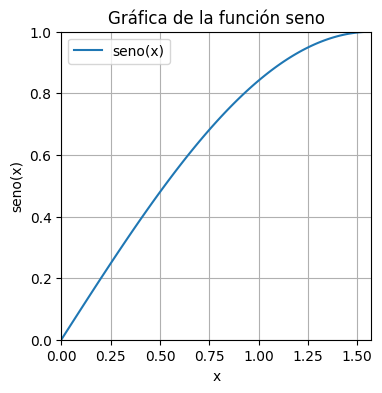

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Definir los valores de x desde 0 hasta pi/2
x = np.linspace(0, np.pi/2, 100)

# Calcular los valores de y usando la función seno
y = np.sin(x)

# Crear la gráfica
plt.figure(figsize=[4,4])
plt.plot(x, y, label='seno(x)')

# Establecer los límites de los ejes
plt.xlim(0, np.pi/2)
plt.ylim(0, 1)

# Añadir etiquetas y título
plt.xlabel('x')
plt.ylabel('seno(x)')
plt.title('Gráfica de la función seno')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


g(x) = sen(x)
y = cx

$\int_0^\frac{\pi}{2} cx = 1$

$c[\frac{x^2}{2}|_0^\frac{\pi}{2}]$

$c*\frac{\pi^2}{8}=1$

$c=\frac{8}{\pi^2}$

In [11]:
# La altura es proporcional
import numpy as np
from math import pi
from math import sin

In [28]:
a=0
b=pi/2

simulacion=9999

convergencia = []
for i in range(simulacion):
    datos = 1000
    x = np.random.uniform(a,b,datos)
    valor = 1/datos*np.sum(np.sin(x)/((8/pi**2)*x))
    convergencia.append(valor)
np.mean(convergencia)

1.076651487739351

In [29]:
valor_convergente = np.cumsum(convergencia)/np.arange(1,simulacion+1)

In [30]:
import matplotlib.pyplot as plt

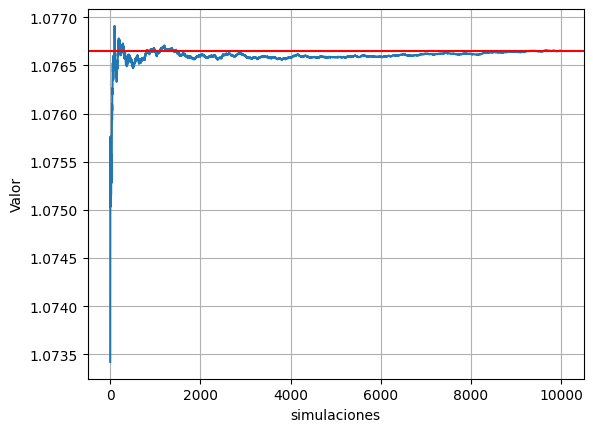

In [31]:
plt.plot(valor_convergente)
plt.grid(True)
plt.xlabel("simulaciones")
plt.ylabel("Valor")
plt.axhline(np.mean(convergencia), color='r', linestyle='-')
plt.show()

## Integración de $\sin(x)$ desde $0$ hasta $\frac{\pi}{2}$

Para encontrar el valor de la integral de $\sin(x)$ en el intervalo de $[0, \frac{\pi}{2}]$, seguimos los siguientes pasos:

1. **Planteamiento de la Integral**

   La integral que queremos calcular es:

   $$\int_0^{\frac{\pi}{2}} \sin(x) \, dx$$

2. **Aplicación de la Fórmula de Integración**

   Sabemos que la integral indefinida de $\sin(x)$ es $-\cos(x)$. Entonces, al integrar dentro de los límites de $0$ a $\frac{\pi}{2}$, obtenemos:

   $$-\cos(x) \Big|_0^{\frac{\pi}{2}}$$

3. **Evaluación en los Límites de Integración**

   Ahora, evaluamos la función antiderivada $-\cos(x)$ en los límites superior e inferior, y restamos:

   $$= -\cos\left(\frac{\pi}{2}\right) - (-\cos(0))$$

   Dado que $\cos\left(\frac{\pi}{2}\right) = 0$ y $\cos(0) = 1$, esto se simplifica a:

   $$= -0 + 1 = 1$$

Por lo tanto, el resultado de la integral de $\sin(x)$ desde $0$ hasta $\frac{\pi}{2}$ es **1**.